In [10]:
import numpy as np
x = 42
np.random.seed(x)
print(x)

42


Train shape (X,y): (60000, 784) (60000,)
Test  shape (X,y): (10000, 784) (10000,)


c:\Users\Soham\Desktop\LP-IV\.venv\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/11
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.8269 - loss: 0.5801 - val_accuracy: 0.9445 - val_loss: 0.2030
Epoch 2/11
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9199 - loss: 0.2705 - val_accuracy: 0.9617 - val_loss: 0.1457
Epoch 3/11
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9389 - loss: 0.2048 - val_accuracy: 0.9682 - val_loss: 0.1189
Epoch 4/11
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9506 - loss: 0.1674 - val_accuracy: 0.9712 - val_loss: 0.1046
Epoch 5/11
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9568 - loss: 0.1460 - val_accuracy: 0.9735 - val_loss: 0.0930
Epoch 6/11
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9621 - loss: 0.1279 - val_accuracy: 0.9752 - val_loss: 0.0868
Epoch 7/11
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9666 - loss: 0.1132 - val_accuracy: 0.9768 - val_loss: 0.0824
Epoch 8/11
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9696 - loss: 0.1035 - val_acc

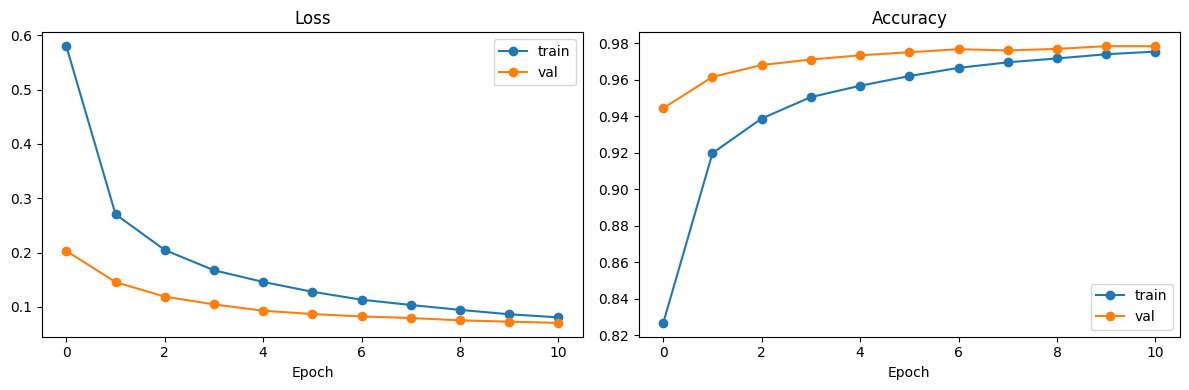

In [ ]:
#MNIST Code

# Single cell: robust loader + training for your CSV format (header like "label,1x1,1x2,...")
# Make sure mnist_train.csv and mnist_test.csv are in the working directory.

# Uncomment to (re)install packages in notebook environment if needed:
# !pip install -q numpy pandas matplotlib tensorflow

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

# reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

train_path = "mnist_train.csv"
test_path  = "mnist_test.csv"

if not (os.path.exists(train_path) and os.path.exists(test_path)):
    raise FileNotFoundError(f"Make sure {train_path} and {test_path} exist in: {os.getcwd()}")

def load_mnist_csv_with_header(path, expected_pixels=784):
    # Read CSV, treating first row as header (your header contains tokens like '1x1')
    df = pd.read_csv(path, header=0)  # header=0 ensures first line is column names
    # Convert all values to numeric; bad values -> NaN
    df = df.apply(pd.to_numeric, errors="coerce").dropna()
    
    y = df.iloc[:, 0].astype(int).values
    X = df.iloc[:, 1:].astype("float32").values
    return X, y

# Load
X_train, y_train = load_mnist_csv_with_header(train_path)
X_test,  y_test  = load_mnist_csv_with_header(test_path)

# Sanity checks
print("Train shape (X,y):", X_train.shape, y_train.shape)
print("Test  shape (X,y):", X_test.shape,  y_test.shape)
if X_train.shape[1] != 784:
    print(f"Warning: expected 784 pixel columns, found {X_train.shape[1]}.")

# Normalize pixels to [0,1]
X_train /= 255.0
X_test  /= 255.0

# One-hot encode labels
num_classes = len(np.unique(y_train))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat  = to_categorical(y_test,  num_classes)

# Build simple feedforward NN
input_dim = X_train.shape[1]
model = Sequential([
    Dense(256, activation="relu", input_shape=(input_dim,)),
    Dropout(0.2),
    Dense(128, activation="relu"),
    Dropout(0.2),
    Dense(num_classes, activation="softmax"),
])

optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Train for exactly 11 epochs
history = model.fit(
    X_train, y_train_cat,
    validation_split=0.1,
    epochs=11,
    batch_size=128,
    verbose=1
)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}   Test Accuracy: {test_acc*100:.2f}%")

# Plot training loss & accuracy
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], marker='o', label="train")
if "val_loss" in history.history:
    plt.plot(history.history["val_loss"], marker='o', label="val")
plt.title("Loss")
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], marker='o', label="train")
if "val_accuracy" in history.history:
    plt.plot(history.history["val_accuracy"], marker='o', label="val")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [13]:
train_path = ""
test_path = ""

In [14]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [16]:
def load_mnist_csv_with_header(path , expected_pixels = 784):
  df = pd.read_csv(path , header = 0)
  df = df.apply(pd.to_numeric , errors = "coerce")
  if df.shape[1] > expected_pixels + 1:
    df = df.iloc[: , :expected_pixels + 1]
  df = df.dropna()

  y = df.iloc[: , 0].astype(int).values
  x = df.iloc[: , 1:].astype("float32").values
  return X, y